In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


Load Dataset

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Prepare data

In [3]:
X = df.drop(['Species','Id'], axis=1)
y = df['Species']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Try different K values

In [5]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

Plotting

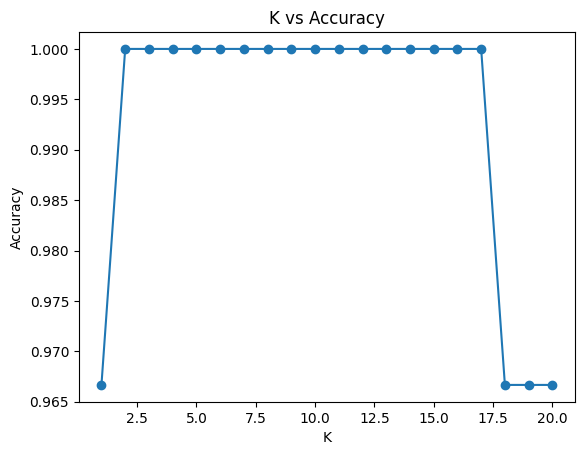

In [6]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

Best K

In [7]:
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k)

Best k: 2


 Final model

In [8]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

Final Accuracy: 1.0


Confusion Matrix

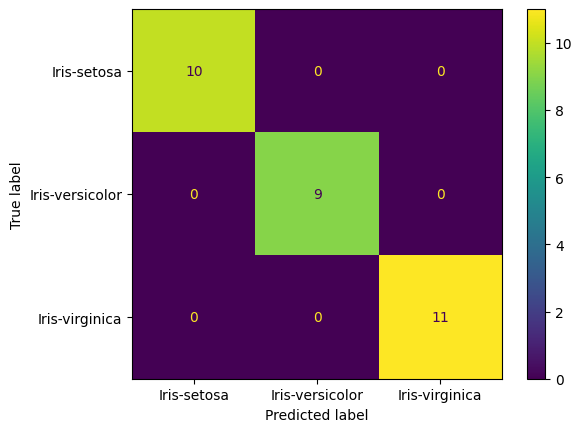

In [9]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=knn.classes_).plot()
plt.show()

PCA for visualization

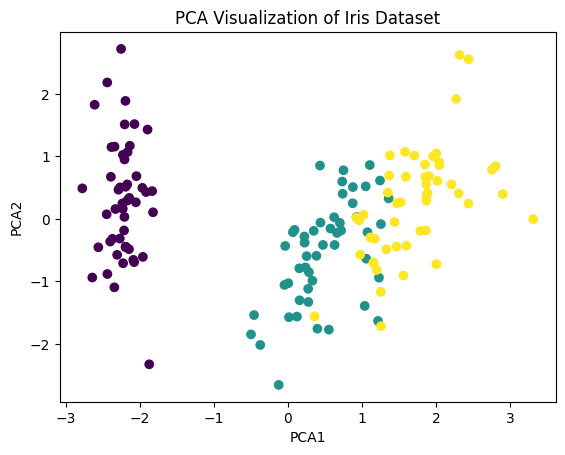

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=pd.factorize(y)[0])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Visualization of Iris Dataset")
plt.show()